# Homework #4 - Ravi Raghavan

In [31]:
#Import Numpy and set the random seed number to 42
import numpy as np
np.random.seed(42)

#Import matplotlib
import matplotlib.pyplot as plt

## Vanilla Gradient Descent

In [32]:
#Run Vanilla Gradient Descent Algorithm
#f: function that we are trying to optimize
#gradient: function that computes gradient of f at particular point
#x0: initial starting point
#alpha: fixed step size
#max_iter: maximum number of iterations to run
#epislon: converge criterion for function value
def vanilla_gradient_descent(f, gradient, x0: np.ndarray, alpha, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    #maintain arrays to store iterates and function values throughout gradient descent
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    #enter for loop of max_iter times
    for iter in range(max_iter):
        grad = gradient(x) #compute gradient
        descent_direction = -1 * grad #our descent direction is the negative gradient
        x = x + (alpha * descent_direction) #compute next iterate
        points = np.append(points, x[np.newaxis, :, :], axis=0) #store point in points array
                
        #if we have satisfied our convergence criteria, break from loop
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        #calculate updated function value
        fx = f(x)
        function_values.append(fx)
    
    #store function value in array
    function_values = np.array(function_values)
    return points, function_values

## Exact Line Search

In [33]:
#Run Gradient Descent Algorithm with Exact Line Search
#f: function that we are trying to optimize
#gradient: function that computes gradient of f at particular point
#exact_line_search: function to calculate the best step size to take at every iterate(i.e. this is the line search function)
#x0: initial starting point
#max_iter: maximum number of iterations to run
#epislon: converge criterion for function value
def exact_line_search_gradient_descent(f, gradient, exact_line_search, x0: np.ndarray, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    #maintain arrays to store iterates and function values throughout gradient descent
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    #enter for loop of max_iter times
    for iter in range(max_iter):
        grad = gradient(x) #compute gradient
        descent_direction = -1 * grad #our descent direction is the negative gradient
        alpha = exact_line_search(x, descent_direction) #compute best step size
        x = x + (alpha * descent_direction) #compute next iterate
        points = np.append(points, x[np.newaxis, :, :], axis=0) #store point in points array
        
        #if we have satisfied our convergence criteria, break from loop        
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        #calculate updated function value
        fx = f(x)
        function_values.append(fx)
    
    #store function value in array
    function_values = np.array(function_values)
    return points, function_values

## Backtracking Line Search

In [34]:
#Run Gradient Descent Algorithm with Exact Line Search
#f: function that we are trying to optimize
#gradient: function that computes gradient of f at particular point
#backtracking_algorithm: function to run the backtracking algorithm to get the step size
#x0: initial starting point
#max_iter: maximum number of iterations to run
#epislon: converge criterion for function value
def backtracking_line_search_gradient_descent(f, gradient, backtracking_algorithm, x0: np.ndarray, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    #maintain arrays to store iterates and function values throughout gradient descent
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    #enter for loop of max_iter times
    for iter in range(max_iter):
        grad = gradient(x) #compute gradient
        descent_direction = -1 * grad #our descent direction is the negative gradient
        alpha = backtracking_algorithm(x, descent_direction) #compute best step size
        x = x + (alpha * descent_direction) #compute next iterate
        points = np.append(points, x[np.newaxis, :, :], axis=0) #store point in points array
        
        #if we have satisfied our convergence criteria, break from loop
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        #calculate updated function value
        fx = f(x)
        function_values.append(fx)
    
    #store function value in array
    function_values = np.array(function_values)
    return points, function_values

## Quadratic Function

$f_1(x) = \frac{1}{2} (x_1^2 + \gamma x_2^2) $

$\frac{\partial{f}}{\partial{x_1}} = x_1$

$\frac{\partial{f}}{\partial{x_2}} = \gamma x_2$

$\nabla f_1(x) = 
\begin{pmatrix}
x_1 \\
\gamma x_2
\end{pmatrix}
$



Exact Line Search Derivation:

$f_1(x + \alpha \Delta x) = \frac{1}{2} (x_1 + \alpha \Delta x_1)^2 + \frac{\gamma}{2} (x_2 + \alpha \Delta x_2)^2$

$\frac{d}{d \alpha} f_1(x + \alpha \Delta x) = \Delta x_1 (x_1 + \alpha \Delta x_1) + \gamma(x_2 + \alpha \Delta x_2)(\Delta x_2)$

Set this derivative to 0 and solve for $\alpha$ 

$\Delta x_1 (x_1 + \alpha \Delta x_1) + \gamma(x_2 + \alpha \Delta x_2)(\Delta x_2) = 0$

$x_1 \Delta x_1 + \alpha (\Delta x_1)^2 + \gamma x_2 \Delta x_2 + \gamma \alpha (\Delta x_2)^2 = 0$

$\alpha * ((\Delta x_1)^2 + \gamma (\Delta x_2)^2) = - x_1 \Delta x_1 - \gamma x_2 \Delta x_2$

To get the value of $\alpha$, we simply solve this equation!

$\alpha = \frac{- x_1 \Delta x_1 - \gamma x_2 \Delta x_2}{(\Delta x_1)^2 + \gamma (\Delta x_2)^2}$

In [35]:
#Calculate the value of the quadratic function at x and given a gamma value
def f1(x: np.ndarray, gamma = 10):
    x1_squared = x[0, 0] ** 2   #x1^2
    x2_squared = x[1, 0] ** 2   #x2^2
    return 0.5 * (x1_squared + (gamma * x2_squared))

#compute the gradient of the quadratic function at x and given a gamma value
def f1_gradient(x: np.ndarray, gamma = 10):
    gradient_vector = np.zeros(shape = x.shape)
    gradient_vector[0, 0] = x[0, 0]
    gradient_vector[1, 0] = gamma * x[1,0]
    return gradient_vector

#Given the exact form for the line search for the quadratic function, output the value of the step size given the exact form computed above
#x: current iterate
#delta_x: descent direction
#gamma: value of gamma
def f1_exact_line_search(x: np.ndarray, delta_x: np.ndarray, gamma = 10):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    delta_x1 = delta_x[0, 0]
    delta_x2 = delta_x[1, 0]
    
    numerator = (-1 * x1 * delta_x1) + (-1 * gamma * x2 * delta_x2)
    denominator = (delta_x1 ** 2) + (gamma * (delta_x2 ** 2))
    
    return numerator / denominator

#Run the backtracking algorithm for the optimization problem involving the quadratic function
#x: current iterate
#delta_x: descent direction
#alpha: value of alpha in backtracking algorithm
#beta: value of beta in backtracking algorithm
#gamma: value of gamma
def f1_backtracking_algorithm(x: np.ndarray, delta_x: np.ndarray, alpha = 0.25, beta = 0.9, gamma = 10):
    t = 1
    while (f1(x + (t * delta_x))) > (f1(x) + (alpha * t * (f1_gradient(x).T @ delta_x))):
        t = beta * t
    return t
    

In [36]:
x0 = np.array([[10], [1]]) #Initial value of iterate

In [37]:
#run vanilla gradient descent for f1(i.e. the quadratic function)
f1_vanilla_gd_iterates, f1_vanilla_gd_function_values = vanilla_gradient_descent(f1, f1_gradient, x0, 0.01, 30, 1e-4)

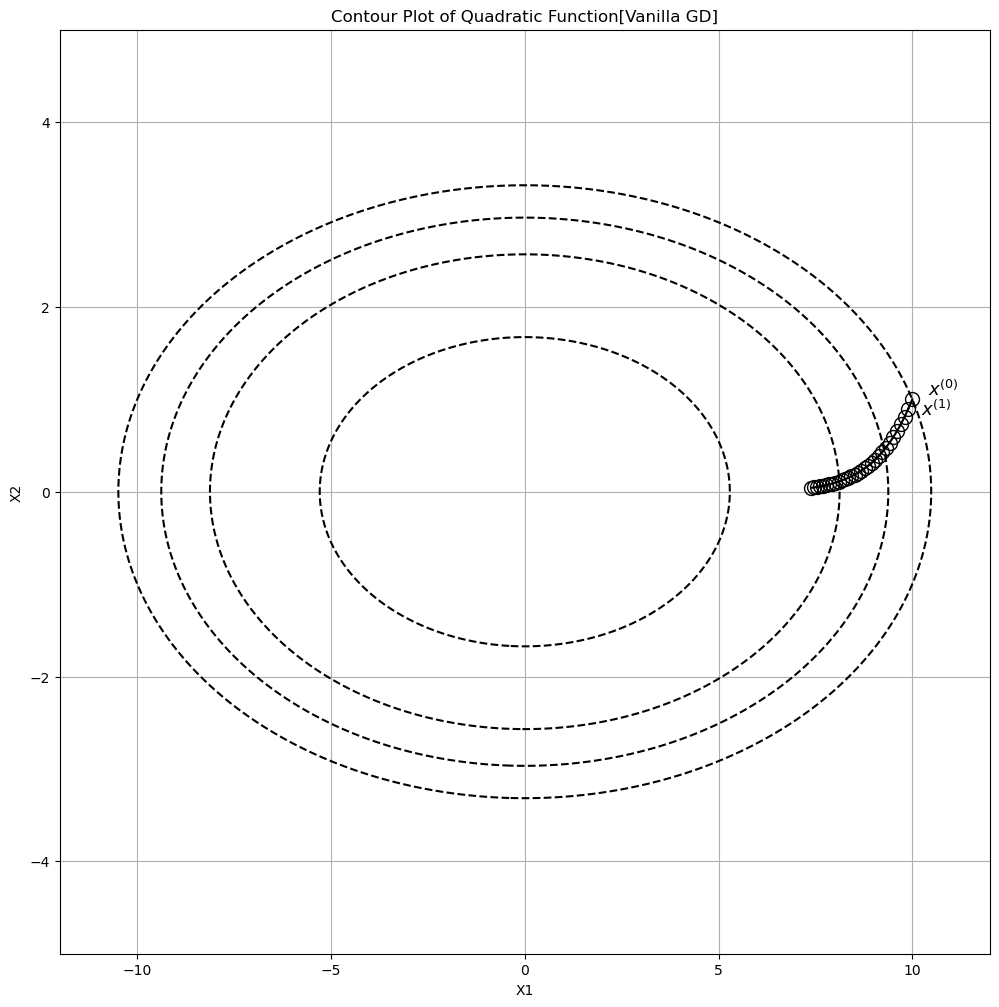

In [38]:
#define ranges for x1 and x2
x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f1 value
#x1, x2: inputs
#gamma: function input
def f1_plot(x1, x2, gamma = 10):
    return 0.5 * ((x1 ** 2) + (gamma * (x2 ** 2)))

#given points on the contour grid, get function values
F = f1_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f1 vanilla GD iterates
for point in f1_vanilla_gd_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')
    
#label x^(0) and x^(1)
offset = 0.4
plt.text(f1_vanilla_gd_iterates[0][0, 0] + offset, f1_vanilla_gd_iterates[0][1, 0], r'$x^{(0)}$', fontsize=13, color='black', va='bottom', ha='left')
plt.text(f1_vanilla_gd_iterates[1][0, 0] + 0.8 * offset, f1_vanilla_gd_iterates[1][1, 0] - 0.3 * offset, r'$x^{(1)}$', fontsize=13, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f1_vanilla_gd_iterates)-1):
    plt.plot([f1_vanilla_gd_iterates[i][0, 0], f1_vanilla_gd_iterates[i+1][0, 0]], [f1_vanilla_gd_iterates[i][1, 0], f1_vanilla_gd_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contour lines
plt.contour(X1, X2, F, levels = [14, 33, 44, 55], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Quadratic Function[Vanilla GD]')
plt.grid(True)
plt.show()

In [39]:
#run gradient descent, with exact line search, for f1(i.e. the quadratic function)
f1_exact_line_search_iterates, f1_exact_line_search_function_values = exact_line_search_gradient_descent(f1, f1_gradient, f1_exact_line_search, x0, 30, 1e-4)

In [40]:
#print iterates from exact line search for f1
f1_exact_line_search_iterates

array([[[ 1.00000000e+01],
        [ 1.00000000e+00]],

       [[ 8.18181818e+00],
        [-8.18181818e-01]],

       [[ 6.69421488e+00],
        [ 6.69421488e-01]],

       [[ 5.47708490e+00],
        [-5.47708490e-01]],

       [[ 4.48125128e+00],
        [ 4.48125128e-01]],

       [[ 3.66647832e+00],
        [-3.66647832e-01]],

       [[ 2.99984590e+00],
        [ 2.99984590e-01]],

       [[ 2.45441937e+00],
        [-2.45441937e-01]],

       [[ 2.00816130e+00],
        [ 2.00816130e-01]],

       [[ 1.64304107e+00],
        [-1.64304107e-01]],

       [[ 1.34430633e+00],
        [ 1.34430633e-01]],

       [[ 1.09988700e+00],
        [-1.09988700e-01]],

       [[ 8.99907542e-01],
        [ 8.99907542e-02]],

       [[ 7.36287989e-01],
        [-7.36287989e-02]],

       [[ 6.02417445e-01],
        [ 6.02417445e-02]],

       [[ 4.92887001e-01],
        [-4.92887001e-02]],

       [[ 4.03271182e-01],
        [ 4.03271182e-02]],

       [[ 3.29949149e-01],
        [-3.29949149e

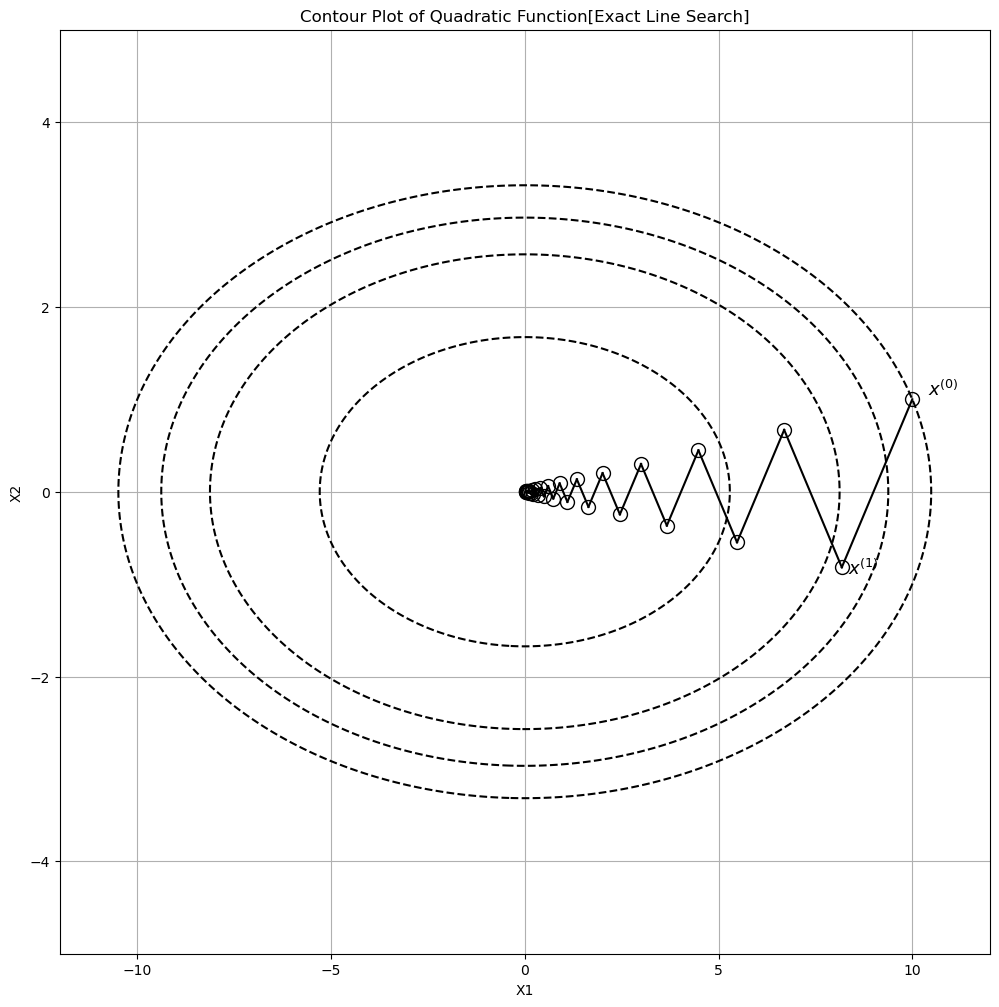

In [41]:
#define ranges for x1 and x2
x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f1 value
#x1, x2: inputs
#gamma: function input
def f1_plot(x1, x2, gamma = 10):
    return 0.5 * ((x1 ** 2) + (gamma * (x2 ** 2)))

#given points on the contour grid, get function values
F = f1_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f1 exact line search iterates
for point in f1_exact_line_search_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')
    
#label x^(0) and x^(1)
offset = 0.4
plt.text(f1_exact_line_search_iterates[0][0, 0] + offset, f1_exact_line_search_iterates[0][1, 0], r'$x^{(0)}$', fontsize=13, color='black', va='bottom', ha='left')
plt.text(f1_exact_line_search_iterates[1][0, 0] + 0.4 * offset, f1_exact_line_search_iterates[1][1, 0] - 0.3 * offset, r'$x^{(1)}$', fontsize=13, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f1_exact_line_search_iterates)-1):
    plt.plot([f1_exact_line_search_iterates[i][0, 0], f1_exact_line_search_iterates[i+1][0, 0]], [f1_exact_line_search_iterates[i][1, 0], f1_exact_line_search_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contour lines
plt.contour(X1, X2, F, levels = [14, 33, 44, 55], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Quadratic Function[Exact Line Search]')
plt.grid(True)
plt.show()

In [42]:
#run gradient descent, with backtracking algorithm, for f1(i.e. the quadratic function)
f1_backtracking_iterates, f1_backtracking_function_values = backtracking_line_search_gradient_descent(f1, f1_gradient, f1_backtracking_algorithm, x0, 30, 1e-4)

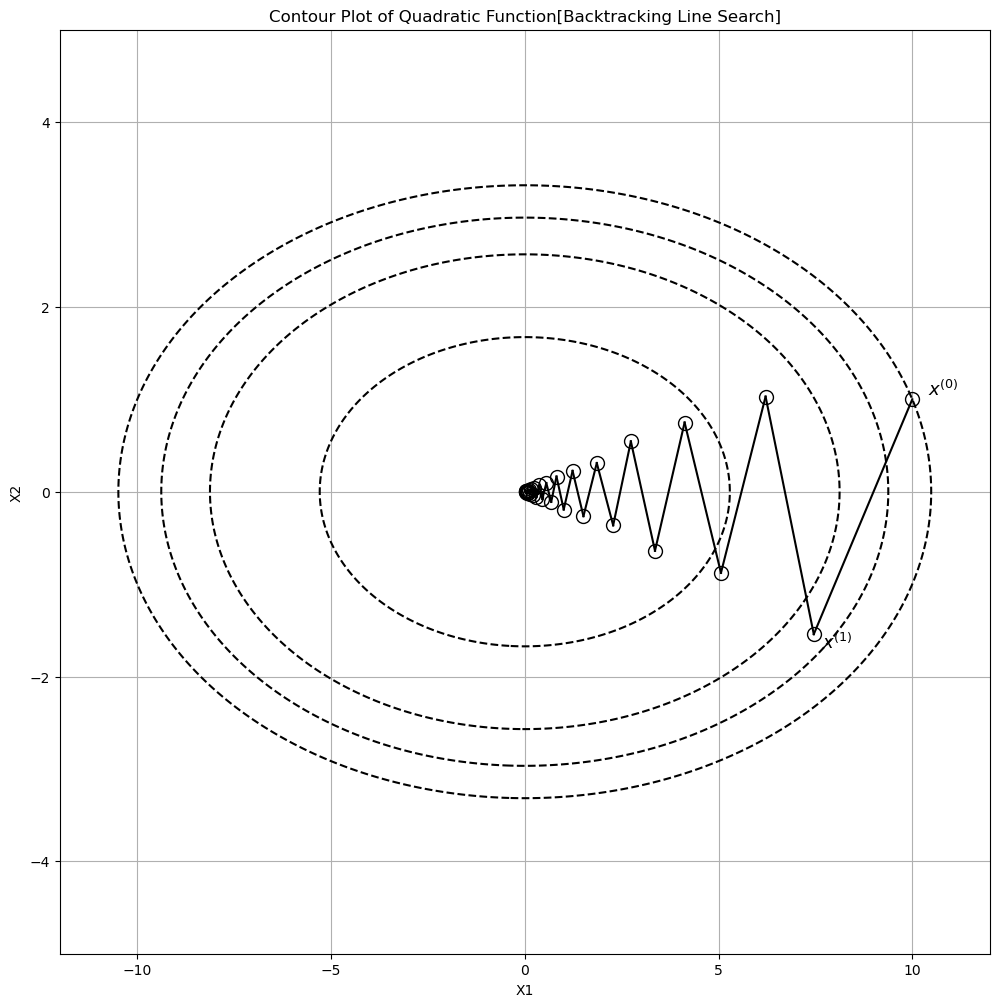

In [43]:
#define ranges for x1 and x2
x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f1 value
#x1, x2: inputs
#gamma: function input
def f1_plot(x1, x2, gamma = 10):
    return 0.5 * ((x1 ** 2) + (gamma * (x2 ** 2)))

#given points on the contour grid, get function values
F = f1_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f1 backtracking iterates
for point in f1_backtracking_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')
    
#label x^(0) and x^(1)
offset = 0.4
plt.text(f1_backtracking_iterates[0][0, 0] + offset, f1_backtracking_iterates[0][1, 0], r'$x^{(0)}$', fontsize=13, color='black', va='bottom', ha='left')
plt.text(f1_backtracking_iterates[1][0, 0] + 0.5 * offset, f1_backtracking_iterates[1][1, 0] - 0.5 * offset, r'$x^{(1)}$', fontsize=13, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f1_backtracking_iterates)-1):
    plt.plot([f1_backtracking_iterates[i][0, 0], f1_backtracking_iterates[i+1][0, 0]], [f1_backtracking_iterates[i][1, 0], f1_backtracking_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contour lines
plt.contour(X1, X2, F, levels = [14, 33, 44, 55], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Quadratic Function[Backtracking Line Search]')
plt.grid(True)
plt.show()

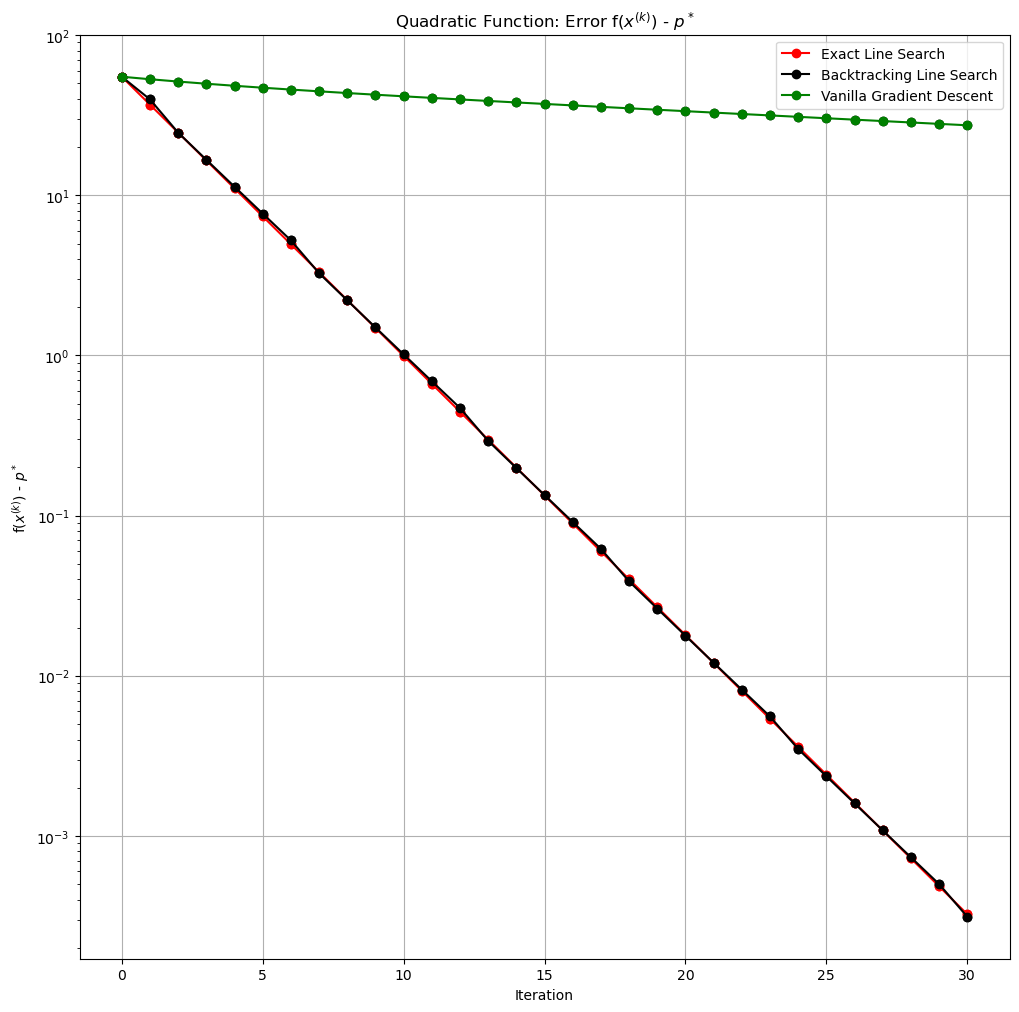

In [44]:
#optimal function value
p_star = 0

#compute error values(i.e. difference between function value and optimal function value) throughout iterations of exact line search gradient descent and backtracking gradient descent and vanilla gradient descent
f1_exact_line_search_distance_from_optimal = f1_exact_line_search_function_values - p_star
f1_backtracking_distance_from_optimal = f1_backtracking_function_values - p_star
f1_vanilla_gd_distance_from_optimal = f1_vanilla_gd_function_values - p_star

#set figure size
plt.figure(figsize = (12, 12))

#plot error values
line1, = plt.plot(f1_exact_line_search_distance_from_optimal, marker='o', color='red', linestyle='-')
line2, = plt.plot(f1_backtracking_distance_from_optimal, marker='o', color='black', linestyle='-')
line3, = plt.plot(f1_vanilla_gd_distance_from_optimal, marker='o', color='green', linestyle='-')

#indicate, via points, each error value on the lines
plt.scatter(range(len(f1_exact_line_search_distance_from_optimal)), f1_exact_line_search_distance_from_optimal, color='red')
plt.scatter(range(len(f1_backtracking_distance_from_optimal)), f1_backtracking_distance_from_optimal, color='black')
plt.scatter(range(len(f1_vanilla_gd_distance_from_optimal)), f1_vanilla_gd_distance_from_optimal, color='black')

#label axes, label title, and add legend
plt.xlabel('Iteration')
plt.ylabel(r'f($x^{(k)}$) - $p^*$')
plt.yscale('log')
plt.title(r'Quadratic Function: Error f($x^{(k)}$) - $p^*$')
plt.legend(handles=[line1, line2, line3], labels=['Exact Line Search', 'Backtracking Line Search', 'Vanilla Gradient Descent'])
plt.grid(True)
plt.show()


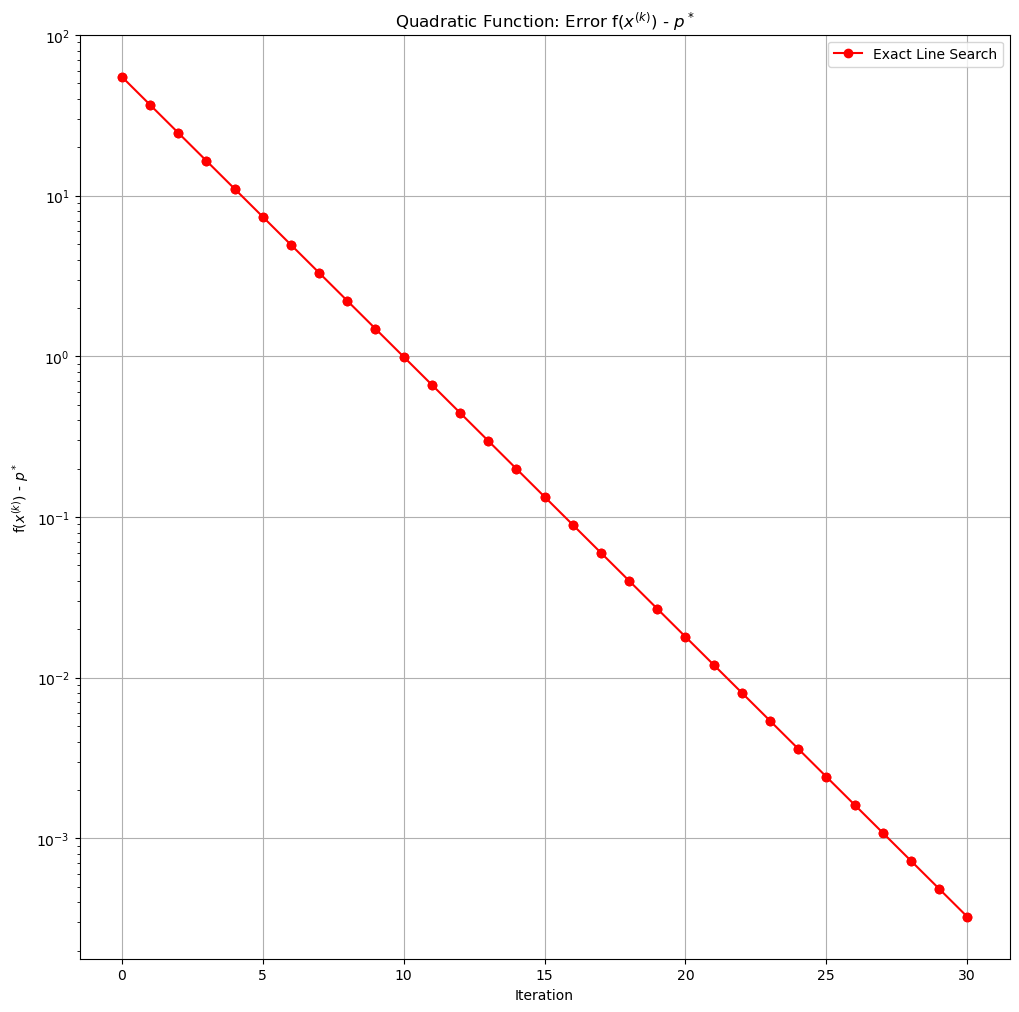

In [45]:
#set figure size
plt.figure(figsize = (12, 12))

#plot error values
line1, = plt.plot(f1_exact_line_search_distance_from_optimal, marker='o', color='red', linestyle='-')

#indicate, via points, each error value on the lines
plt.scatter(range(len(f1_exact_line_search_distance_from_optimal)), f1_exact_line_search_distance_from_optimal, color='red')

#label axes, label title, and add legend
plt.xlabel('Iteration')
plt.ylabel(r'f($x^{(k)}$) - $p^*$')
plt.yscale('log')
plt.title(r'Quadratic Function: Error f($x^{(k)}$) - $p^*$')
plt.legend(handles=[line1], labels=['Exact Line Search'])
plt.grid(True)
plt.show()

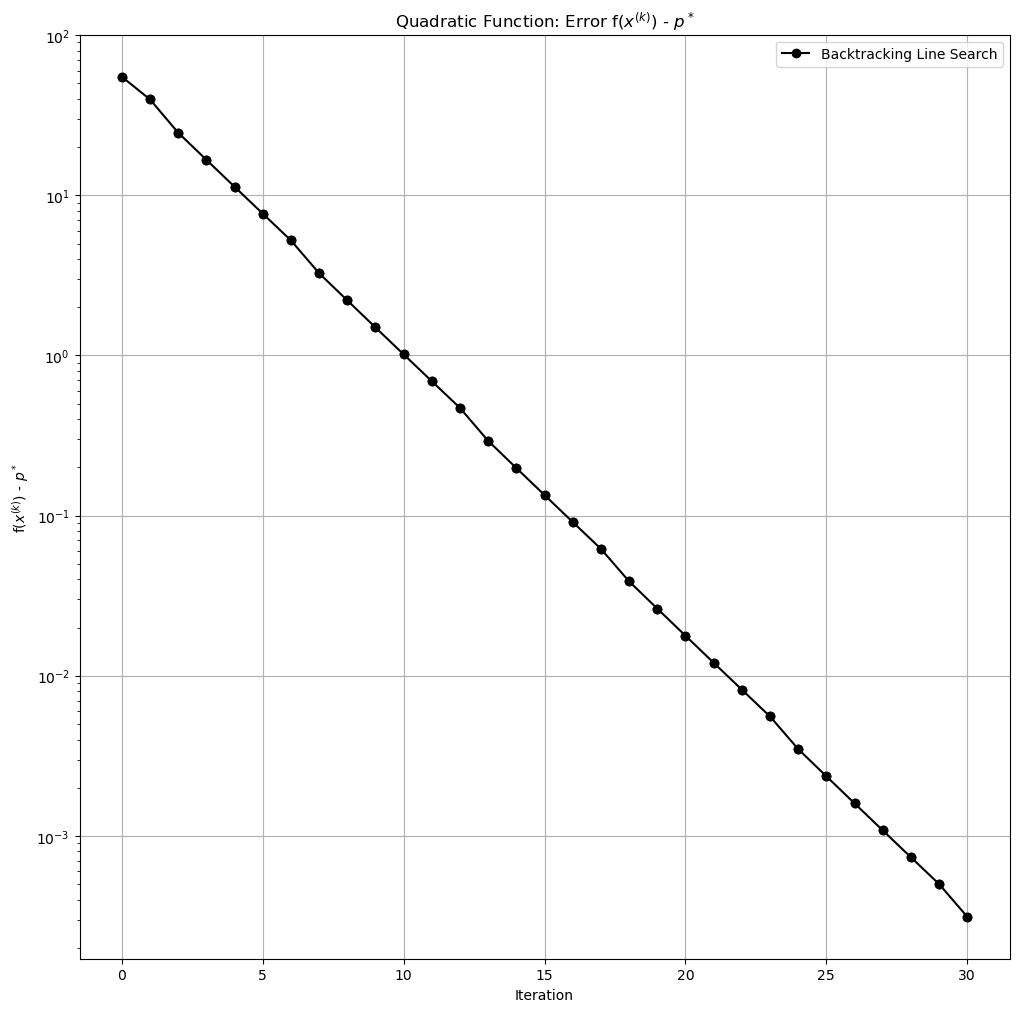

In [46]:
#set figure size
plt.figure(figsize = (12, 12))

#plot error values
line2, = plt.plot(f1_backtracking_distance_from_optimal, marker='o', color='black', linestyle='-')

#indicate, via points, each error value on the lines
plt.scatter(range(len(f1_backtracking_distance_from_optimal)), f1_backtracking_distance_from_optimal, color='black')

#label axes, label title, and add legend
plt.xlabel('Iteration')
plt.ylabel(r'f($x^{(k)}$) - $p^*$')
plt.yscale('log')
plt.title(r'Quadratic Function: Error f($x^{(k)}$) - $p^*$')
plt.legend(handles=[line2], labels=['Backtracking Line Search'])
plt.grid(True)
plt.show()

In [47]:
f1_exact_line_search_function_values

array([5.50000000e+01, 3.68181818e+01, 2.46468820e+01, 1.64991524e+01,
       1.10448872e+01, 7.39368480e+00, 4.94949148e+00, 3.31329595e+00,
       2.21799150e+00, 1.48477117e+00, 9.93937726e-01, 6.65363271e-01,
       4.45408471e-01, 2.98166001e-01, 1.99598728e-01, 1.33615677e-01,
       8.94452056e-02, 5.98765426e-02, 4.00826442e-02, 2.68321833e-02,
       1.79620401e-02, 1.20241756e-02, 8.04924150e-03, 5.38833522e-03,
       3.60706738e-03, 2.41464841e-03, 1.61641753e-03, 1.08206463e-03,
       7.24357313e-04, 4.84900350e-04, 3.24602714e-04])

In [48]:
f1_backtracking_function_values

array([5.50000000e+01, 3.96986338e+01, 2.46086126e+01, 1.66722492e+01,
       1.13123758e+01, 7.68772777e+00, 5.23308749e+00, 3.26409747e+00,
       2.20882200e+00, 1.49687126e+00, 1.01593663e+00, 6.90619922e-01,
       4.70254563e-01, 2.92917773e-01, 1.98269155e-01, 1.34399184e-01,
       9.12435981e-02, 6.20446346e-02, 3.88804678e-02, 2.62874400e-02,
       1.77979768e-02, 1.20678786e-02, 8.19523408e-03, 5.57434147e-03,
       3.48855955e-03, 2.35923403e-03, 1.59774461e-03, 1.08364628e-03,
       7.36111651e-04, 5.00849565e-04, 3.13025760e-04])

## Non-Quadratic Function

$f_2(x_1, x_2) = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$


$\frac{\partial{f_2}}{\partial{x_1}} = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1}$

$\frac{\partial{f_2}}{\partial{x_2}} = 3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}$

$\nabla f_2(x) = 
\begin{pmatrix}
e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1} \\
3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}
\end{pmatrix}
$


Exact Line Search: 

$f_2(x_1 + \alpha \Delta x_1, x_2 + \alpha \Delta x_2) = e^{x_1 + \alpha \Delta x_1 +  3x_2 + 3\alpha \Delta x_2 - 0.1} + e^{x_1 + \alpha \Delta x_1 - 3x_2 - 3\alpha \Delta x_2 - 0.1} + e^{-x_1 - \alpha \Delta x_1 - 0.1}$

$\frac{d}{d \alpha} f_2(x_1 + \alpha \Delta x_1, x_2 + \alpha \Delta x_2) = (\Delta x_1 + 3\Delta x_2) e^{x_1 + \alpha \Delta x_1 +  3x_2 + 3\alpha \Delta x_2 - 0.1} + (\Delta x_1 - 3\Delta x_2) e^{x_1 + \alpha \Delta x_1 - 3x_2 - 3\alpha \Delta x_2 - 0.1} + (-\Delta x_1) e^{-x_1 - \alpha \Delta x_1 - 0.1}$


In [49]:
#Calculate the value of the non-quadratic function at x
def f2(x: np.ndarray):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    A = np.exp(x1 + (3 * x2) - 0.1)
    B = np.exp(x1 - (3 * x2) - 0.1)
    C = np.exp((-1 * x1) - 0.1)
    
    return A + B + C

#Calculate the value of the gradient of the non-quadratic function at x
def f2_gradient(x: np.ndarray):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    A = x1 + (3 * x2) - 0.1
    B = x1 - (3 * x2) - 0.1
    C = (-1 * x1) - 0.1
    
    gradient_vector = np.zeros(shape = x.shape)
    gradient_vector[0, 0] = np.exp(A) + np.exp(B) - np.exp(C)
    gradient_vector[1, 0] = (3 * np.exp(A)) - (3 * np.exp(B))
    
    return gradient_vector

#Since there is no exact form for line search for the non-quadratic function, run a grid search
#x: current iterate
#delta_x: descent direction
def f2_exact_line_search(x: np.ndarray, delta_x: np.ndarray):
    grid_search_alphas = np.arange(start = 0, stop = 1, step = 0.0003) #alphas for which we are running a grid search
    
    #store best alpha and best function value for that alpha
    best_alpha = None
    best_function_value = np.inf
    
    #run a grid search over alphas
    for alpha in grid_search_alphas:
        #if we have found a better alpha
        if f2(x + (alpha * delta_x)) < best_function_value:
            best_alpha = alpha #update best alpha
            best_function_value = f2(x + (alpha * delta_x)) #update best alpha

    return best_alpha
    

#Run the backtracking algorithm for the optimization problem involving the non-quadratic function
#x: current iterate
#delta_x: descent direction
#alpha: value of alpha in backtracking algorithm
#beta: value of beta in backtracking algorithm
def f2_backtracking_algorithm(x: np.ndarray, delta_x: np.ndarray, alpha = 0.1, beta = 0.7):
    t = 1
    while (f2(x + (t * delta_x))) > (f2(x) + (alpha * t * (f2_gradient(x).T @ delta_x))):
        t = beta * t
    
    return t

In [50]:
x0 = np.array([[-0.9], [1.1]]) #initial iterate for gradient descent

In [51]:
#run vanilla gradient descent for f2(i.e. the non-quadratic function)
f2_vanilla_gd_iterates, f2_vanilla_gd_function_values = vanilla_gradient_descent(f2, f2_gradient, x0, 0.01, 30, 1e-8)

In [52]:
#run gradient descent, with exact line search, for f2(i.e. the non-quadratic function)
f2_exact_line_search_iterates, f2_exact_line_search_function_values = exact_line_search_gradient_descent(f2, f2_gradient, f2_exact_line_search, x0, 30, 1e-8)

In [53]:
#run gradient descent, with backtracking, for f2(i.e. the non-quadratic function)
f2_backtracking_iterates, f2_backtracking_function_values = backtracking_line_search_gradient_descent(f2, f2_gradient, f2_backtracking_algorithm, x0, 30, 1e-8)

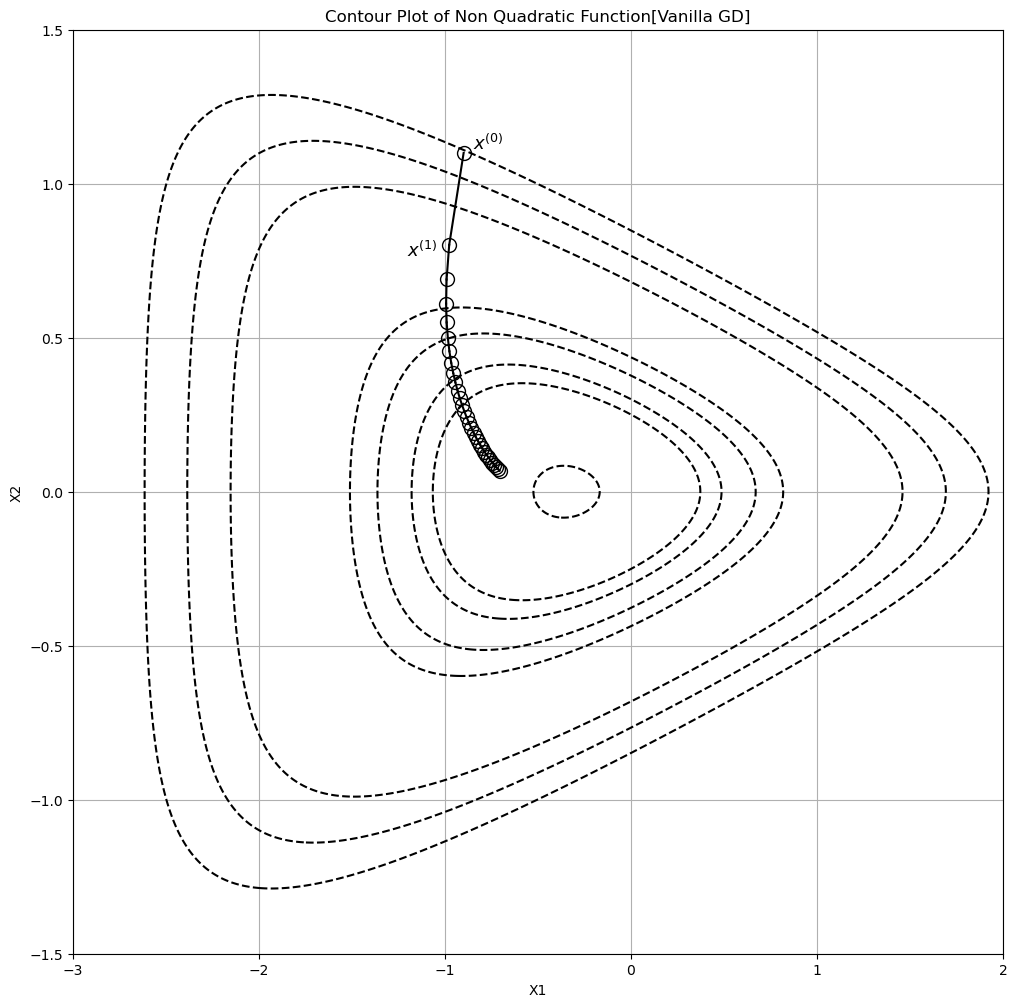

In [54]:
#define ranges for x1 and x2
x1 = np.linspace(-3, 2, 2000)
x2 = np.linspace(-1.5, 1.5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f2 value
#x1, x2: inputs
def f2_plot(x1, x2):
    A = np.exp(x1 + (3 * x2) - 0.1)
    B = np.exp(x1 - (3 * x2) - 0.1)
    C = np.exp((-1 * x1) - 0.1)
    
    return A + B + C

#given points on the contour grid, get function values
F = f2_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f2 vanilla GD iterates
for point in f2_vanilla_gd_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')
    
#label x^(0) and x^(1)
offset = 0.05
plt.text(f2_vanilla_gd_iterates[0][0, 0] + offset, f2_vanilla_gd_iterates[0][1, 0], r'$x^{(0)}$', fontsize=13, color='black', va='bottom', ha='left')
plt.text(f2_vanilla_gd_iterates[1][0, 0] - 4.5 * offset, f2_vanilla_gd_iterates[1][1, 0] - 1 * offset, r'$x^{(1)}$', fontsize=13, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f2_vanilla_gd_iterates)-1):
    plt.plot([f2_vanilla_gd_iterates[i][0, 0], f2_vanilla_gd_iterates[i+1][0, 0]], [f2_vanilla_gd_iterates[i][1, 0], f2_vanilla_gd_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contours
contour = plt.contour(X1, X2, F, levels = [2.6, 3.25, 3.5, 4, 4.5, 8, 10, 12.5], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Non Quadratic Function[Vanilla GD]')
plt.grid(True)
plt.show()

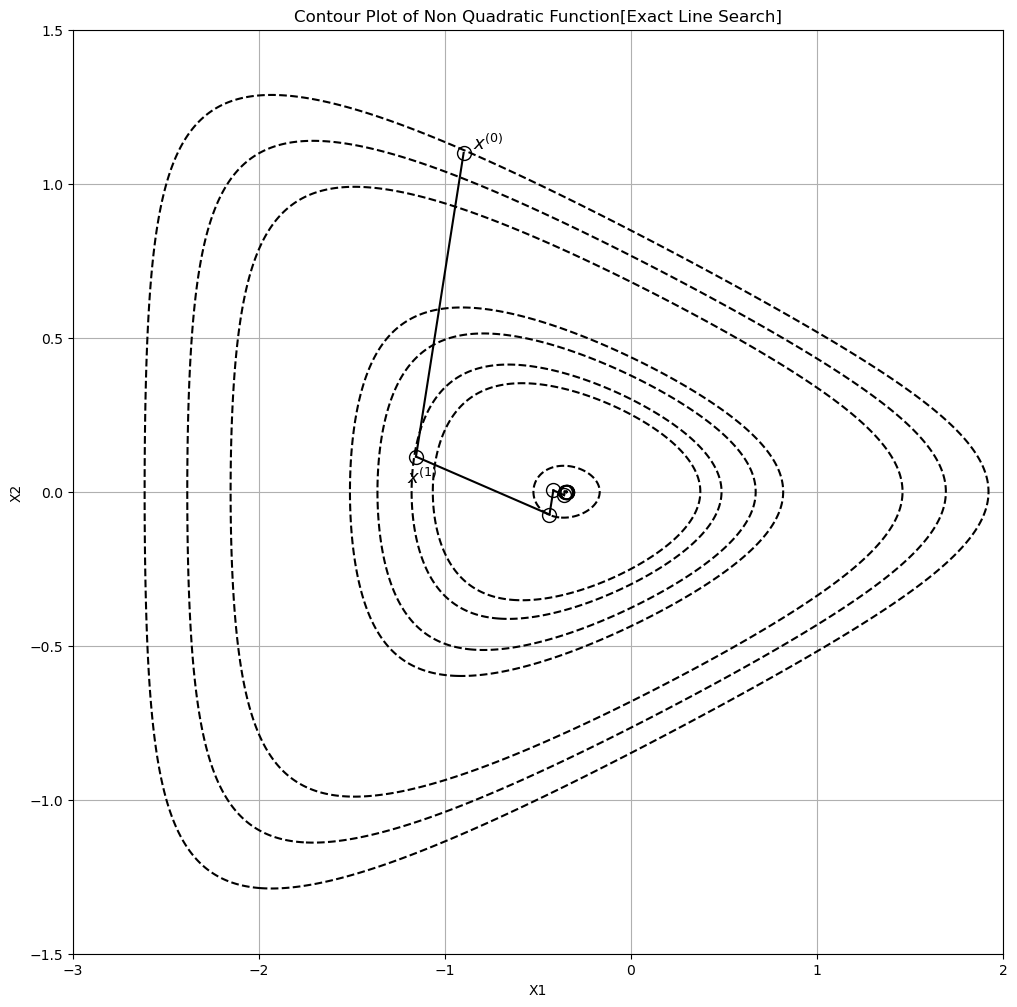

In [55]:
#define ranges for x1 and x2
x1 = np.linspace(-3, 2, 2000)
x2 = np.linspace(-1.5, 1.5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f2 value
#x1, x2: inputs
def f2_plot(x1, x2):
    A = np.exp(x1 + (3 * x2) - 0.1)
    B = np.exp(x1 - (3 * x2) - 0.1)
    C = np.exp((-1 * x1) - 0.1)
    
    return A + B + C

#given points on the contour grid, get function values
F = f2_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f2 exact line search iterates
for point in f2_exact_line_search_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')
    
#label x^(0) and x^(1)
offset = 0.05
plt.text(f2_exact_line_search_iterates[0][0, 0] + offset, f2_exact_line_search_iterates[0][1, 0], r'$x^{(0)}$', fontsize=13, color='black', va='bottom', ha='left')
plt.text(f2_exact_line_search_iterates[1][0, 0] - offset, f2_exact_line_search_iterates[1][1, 0] - 2 * offset, r'$x^{(1)}$', fontsize=13, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f2_exact_line_search_iterates)-1):
    plt.plot([f2_exact_line_search_iterates[i][0, 0], f2_exact_line_search_iterates[i+1][0, 0]], [f2_exact_line_search_iterates[i][1, 0], f2_exact_line_search_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contours
contour = plt.contour(X1, X2, F, levels = [2.6, 3.25, 3.5, 4, 4.5, 8, 10, 12.5], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Non Quadratic Function[Exact Line Search]')
plt.grid(True)
plt.show()

In [56]:
#Print levels of contour plot for debugging information
levels = contour.levels
print("Levels of the contour plot:", levels)

Levels of the contour plot: [ 2.6   3.25  3.5   4.    4.5   8.   10.   12.5 ]


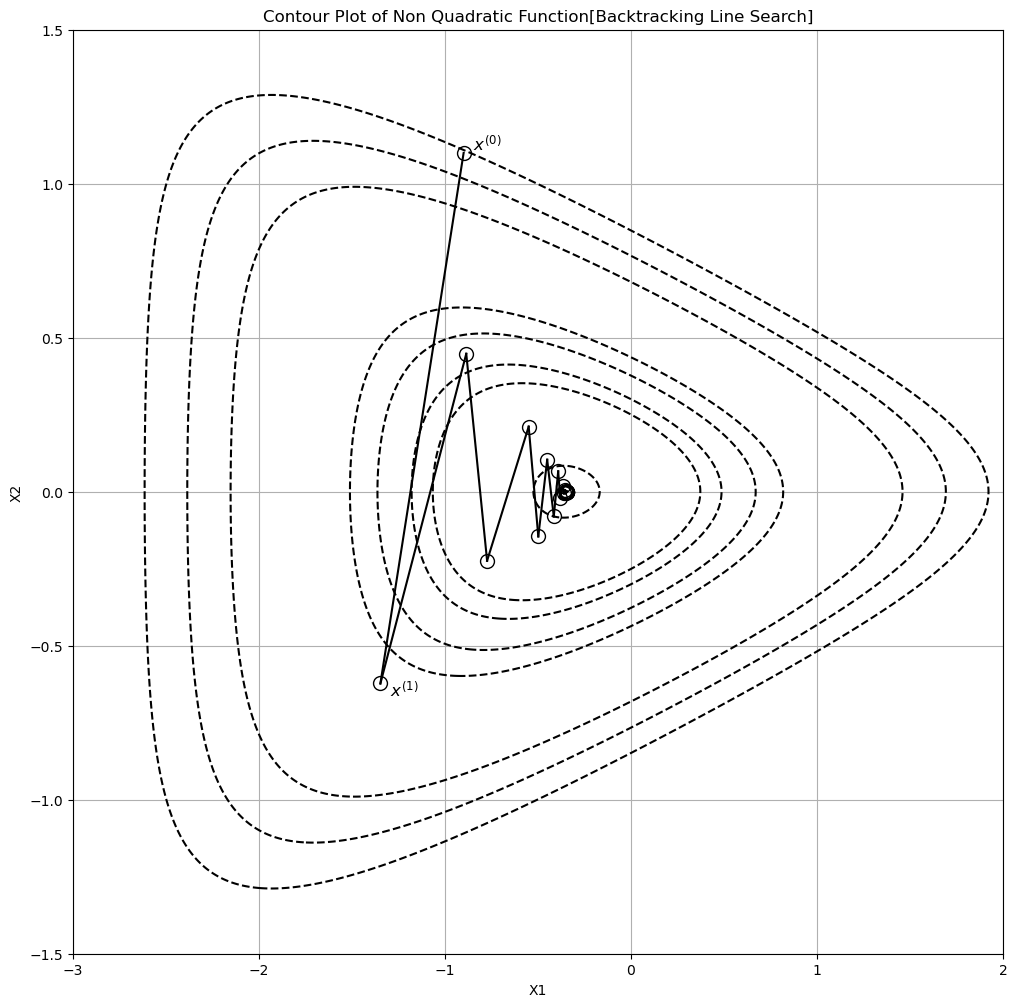

In [57]:
#define ranges for x1 and x2
x1 = np.linspace(-3, 2, 2000)
x2 = np.linspace(-1.5, 1.5, 2000)

#generate (x,y) coordinates for contour grid given x1(x coord) and x2(y coord)
X1, X2 = np.meshgrid(x1, x2)

#function to calculate f2 value
#x1, x2: inputs
def f2_plot(x1, x2):
    A = np.exp(x1 + (3 * x2) - 0.1)
    B = np.exp(x1 - (3 * x2) - 0.1)
    C = np.exp((-1 * x1) - 0.1)
    
    return A + B + C

#given points on the contour grid, get function values
F = f2_plot(X1, X2)

#set figure size
plt.figure(figsize = (12, 12))

#plot f2 backtracking iterates
for point in f2_backtracking_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')

#label x^(0) and x^(1)
offset = 0.05
plt.text(f2_backtracking_iterates[0][0, 0] + offset, f2_backtracking_iterates[0][1, 0], r'$x^{(0)}$', fontsize=12, color='black', va='bottom', ha='left')
plt.text(f2_backtracking_iterates[1][0, 0] + offset, f2_backtracking_iterates[1][1, 0] - 1 * offset, r'$x^{(1)}$', fontsize=12, color='black', va='bottom', ha='left')

#Connect iterates via a line
for i in range(len(f2_backtracking_iterates)-1):
    plt.plot([f2_backtracking_iterates[i][0, 0], f2_backtracking_iterates[i+1][0, 0]], [f2_backtracking_iterates[i][1, 0], f2_backtracking_iterates[i+1][1, 0]], color='black', linestyle='-')

#Plot contours
plt.contour(X1, X2, F, levels = [2.6, 3.25, 3.5, 4, 4.5, 8, 10, 12.5], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Non Quadratic Function[Backtracking Line Search]')
plt.grid(True)
plt.show()

Calculating the Optimal Value of this Function: 

$f_2(x_1, x_2) = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$


$\frac{\partial{f_2}}{\partial{x_1}} = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1}$

$\frac{\partial{f_2}}{\partial{x_2}} = 3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}$

$\nabla f_2(x) = 
\begin{pmatrix}
e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1} \\
3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}
\end{pmatrix}
$

Set this gradient to 0 

Let's start with the partial derivative with respect to $x_2$, which must equal 0 in the gradient: $3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1} = 0$ 

Dividing entire equation by 3: 

$e^{x_1 + 3x_2 - 0.1} - e^{x_1 - 3x_2 - 0.1} = 0$ 

$e^{x_1 + 3x_2 - 0.1} = e^{x_1 - 3x_2 - 0.1}$ 


$x_1 + 3x_2 - 0.1 = x_1 - 3x_2 - 0.1$

It is clear to see that $x_2 = 0$ must be true. 

Now, let's move onto the partial derivative with respect to $x_1$

$e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1} = 0$

Substituting $x_2 = 0$ gives us: 

$e^{x_1 - 0.1} + e^{x_1 - 0.1} - e^{-x_1 - 0.1} = 0$

$2e^{x_1 - 0.1} - e^{-x_1 - 0.1} = 0$

$2e^{x_1 - 0.1} = e^{-x_1 - 0.1}$


$e^{(\ln{2})}e^{x_1 - 0.1} = e^{-x_1 - 0.1}$

$e^{(\ln{2}) + x_1 - 0.1} = e^{-x_1 - 0.1}$

$(\ln{2}) + x_1 - 0.1 = -x_1 - 0.1$

$2x_1 = -(\ln{2})$ 

$x_1 = \frac{-\ln{2}}{2}$ 

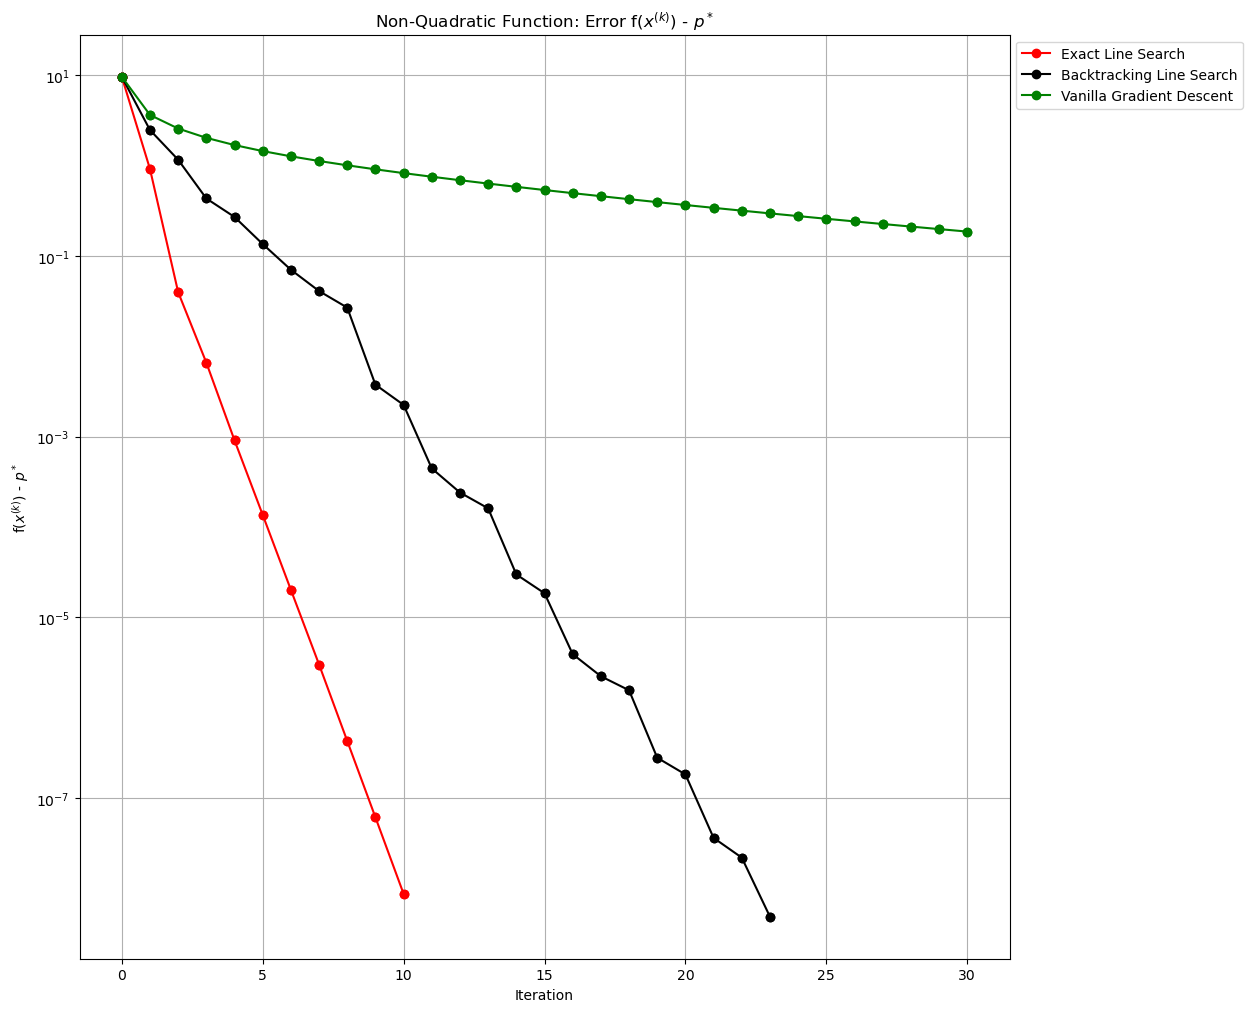

In [58]:
#optimal function value
p_star = f2_plot(-0.5 * np.log(2), 0)

#set figure size
plt.figure(figsize = (12, 12))

#compute error values(i.e. difference between function value and optimal function value) throughout iterations of exact line search gradient descent and backtracking gradient descent and vanilla gradient descent
f2_exact_line_search_distance_from_optimal = f2_exact_line_search_function_values - p_star
f2_backtracking_distance_from_optimal = f2_backtracking_function_values - p_star
f2_vanilla_gd_distance_from_optimal = f2_vanilla_gd_function_values - p_star

#plot error values
line1, = plt.plot(f2_exact_line_search_distance_from_optimal, marker='o', color='red', linestyle='-')
line2, = plt.plot(f2_backtracking_distance_from_optimal, marker='o', color='black', linestyle='-')
line3, = plt.plot(f2_vanilla_gd_distance_from_optimal, marker='o', color='green', linestyle='-')

#indicate, via points, each error value on the lines
plt.scatter(range(len(f2_exact_line_search_distance_from_optimal)), f2_exact_line_search_distance_from_optimal, color='red')
plt.scatter(range(len(f2_backtracking_distance_from_optimal)), f2_backtracking_distance_from_optimal, color='black')
plt.scatter(range(len(f2_vanilla_gd_distance_from_optimal)), f2_vanilla_gd_distance_from_optimal, color='green')


#label axes, label title, and add legend
plt.xlabel('Iteration')
plt.ylabel(r'f($x^{(k)}$) - $p^*$')
plt.yscale('log')
plt.title(r'Non-Quadratic Function: Error f($x^{(k)}$) - $p^*$')
plt.legend(handles=[line1, line2, line3], labels=['Exact Line Search', 'Backtracking Line Search', 'Vanilla Gradient Descent'], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [59]:
p_star = f2_plot(-0.5 * np.log(2), 0)
print(f"Optimal Value of f2 = {p_star}")

Optimal Value of f2 = 2.5592666966582156


In [60]:
###Print function value at initial value of iterate
print(f"Initial value of f2: {f2(x0)}")

Initial value of f2: 12.213291942319392
